In [2]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

In [5]:
def process_img(img):
 gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 noise_free = cv2.fastNlMeansDenoising(gray_image)
 binary_thresh = cv2.threshold(noise_free, 0 , 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
 return binary_thresh

In [6]:
def text_regions(image_data):
    detected_data = pytesseract.image_to_data(image_data,output_type=pytesseract.Output.DICT)
    return detected_data

In [11]:
def mark_text_regions(img,detected_boxes):
    output_img = img.copy()
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i])>60:
            (x,y,width,height) = (detected_boxes['left'][i],detected_boxes['top'][i], detected_boxes['width'][i], detected_boxes['height'][i])
            cv2.rectangle(output_img, (x, y), (x + width, y + height), (0, 255, 0), 4)
    return output_img


In [8]:
def extract_text(detected_boxes):
    text_content = []
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            text_content.append(detected_boxes['text'][i])
    return ' '.join(text_content)


Original Image:


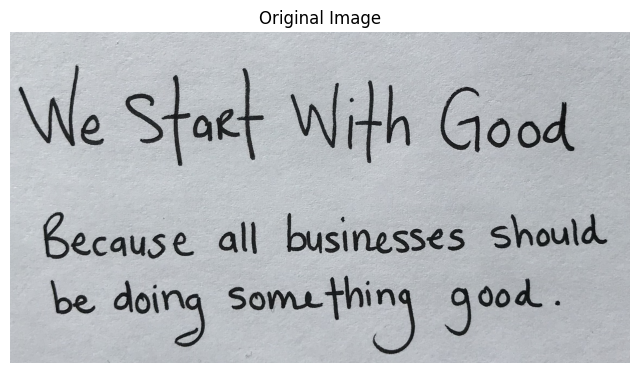


Image with Text Detection Regions:


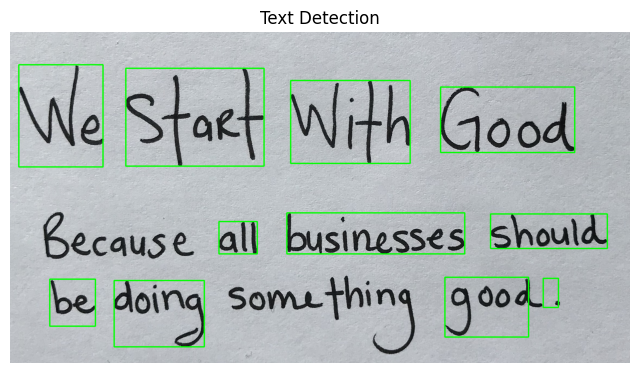


Detected Text:
\Ne Stoet With Good all businesses should be doing Good .


In [12]:
img_path = r"C:\Users\DELL\dl_assignment\dl_assignment5\img.png"

image_loaded = cv2.imread(img_path)

# Check if image was successfully loaded
# Check if image was successfully loaded
if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:
    # Convert BGR to RGB for proper display in matplotlib
    image_rgb = cv2.cvtColor(image_loaded, cv2.COLOR_BGR2RGB)

    # Display original image
    print("\nOriginal Image:")
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Original Image")
    plt.show()

    # Preprocess image
    preprocessed_image = process_img(image_loaded)

    # Detect text regions
    text_boxes = text_regions(preprocessed_image)

    # Draw bounding boxes on the original image
    image_with_boxes = mark_text_regions(image_loaded, text_boxes)
    image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

    # Display the image with detected text regions
    print("\nImage with Text Detection Regions:")
    plt.figure(figsize=(8, 6))
    plt.imshow(image_with_boxes_rgb)
    plt.axis('off')
    plt.title("Text Detection")
    plt.show()

    # Extract and print detected text
    extracted_text = extract_text(text_boxes)
    print("\nDetected Text:")
    print(extracted_text)